# Q.1

 $$ Baseball Case Study $$

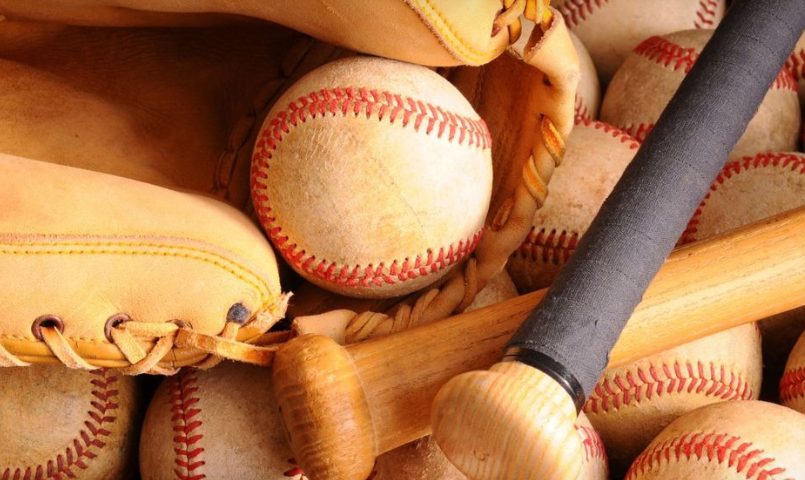

### Project Description

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins

In [1]:
# Let's start with importing necessary liabraries

import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# import statsmodels. api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from pandas.plotting  import scatter_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv') # Reading the data file

data.head() # Checking the first five rows from the dataset

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0  95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1  83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2  81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3  76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   
4  74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   

   SV    E  
0  56   88  
1  45   86  
2  38   79  
3  37  101  
4  35   86

## About the data
- W: Win

- R: Runs

- AB: At Bats

- H: Hits

- 2B: Doubles

- 3B: Triples

- HR: Homeruns

- BB: Walks

- SO: Strikeouts

- SB: Stolen Bases

- RA: Runs Allowed

- ER: Earned Runs

- ERA: Earned Run Average (ERA)

- CG: Complete Games

- SV: Saves

- SHO: Shutouts 

- E: Errors


In [3]:
data.shape

(30, 17)

In [4]:
data.describe()

W           R           AB            H          2B  \
count   30.000000   30.000000    30.000000    30.000000   30.000000   
mean    80.966667  688.233333  5516.266667  1403.533333  274.733333   
std     10.453455   58.761754    70.467372    57.140923   18.095405   
min     63.000000  573.000000  5385.000000  1324.000000  236.000000   
25%     74.000000  651.250000  5464.000000  1363.000000  262.250000   
50%     81.000000  689.000000  5510.000000  1382.500000  275.500000   
75%     87.750000  718.250000  5570.000000  1451.500000  288.750000   
max    100.000000  891.000000  5649.000000  1515.000000  308.000000   

              3B          HR          BB          SO          SB          RA  \
count  30.000000   30.000000   30.000000    30.00000   30.000000   30.000000   
mean   31.300000  163.633333  469.100000  1248.20000   83.500000  688.233333   
std    10.452355   31.823309   57.053725   103.75947   22.815225   72.108005   
min    13.000000  100.000000  375.000000   973.00000   44.000000  525.000000   
25%    23.000000  140.250000  428.250000  1157.50000   69.000000  636.250000   
50%    31.000000  158.500000  473.000000  1261.50000   83.500000  695.500000   
75%    39.000000  177.000000  501.250000  1311.50000   96.500000  732.500000   
max    49.000000  232.000000  570.000000  1518.00000  134.000000  844.000000   

               ER        ERA         CG        SHO         SV           E  
count   30.000000  30.000000  30.000000  30.000000  30.000000   30.000000  
mean   635.833333   3.956333   3.466667  11.300000  43.066667   94.333333  
std     70.140786   0.454089   2.763473   4.120177   7.869335   13.958889  
min    478.000000   2.940000   0.000000   4.000000  28.000000   75.000000  
25%    587.250000   3.682500   1.000000   9.000000  37.250000   86.000000  
50%    644.500000   4.025000   3.000000  12.000000  42.000000   91.000000  
75%    679.250000   4.220000   5.750000  13.000000  46.750000   96.750000  
max    799.000000   5.040000  11.000000  21.000000  62.000000  126.000000

In [5]:
data.isna().sum()  # finding the count of missing values from different columns

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

Now let's showcase the relationship between the feature and target column

<AxesSubplot:>

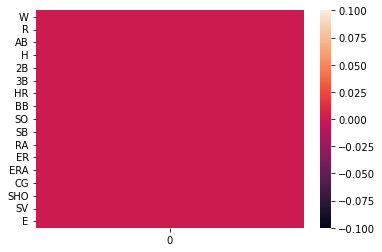

In [6]:
sns.heatmap(data.isnull().sum().to_frame())

- *Above I am checking the null values, as find there are no null values in the data set because the red color is distributed equally correspond to each column*.

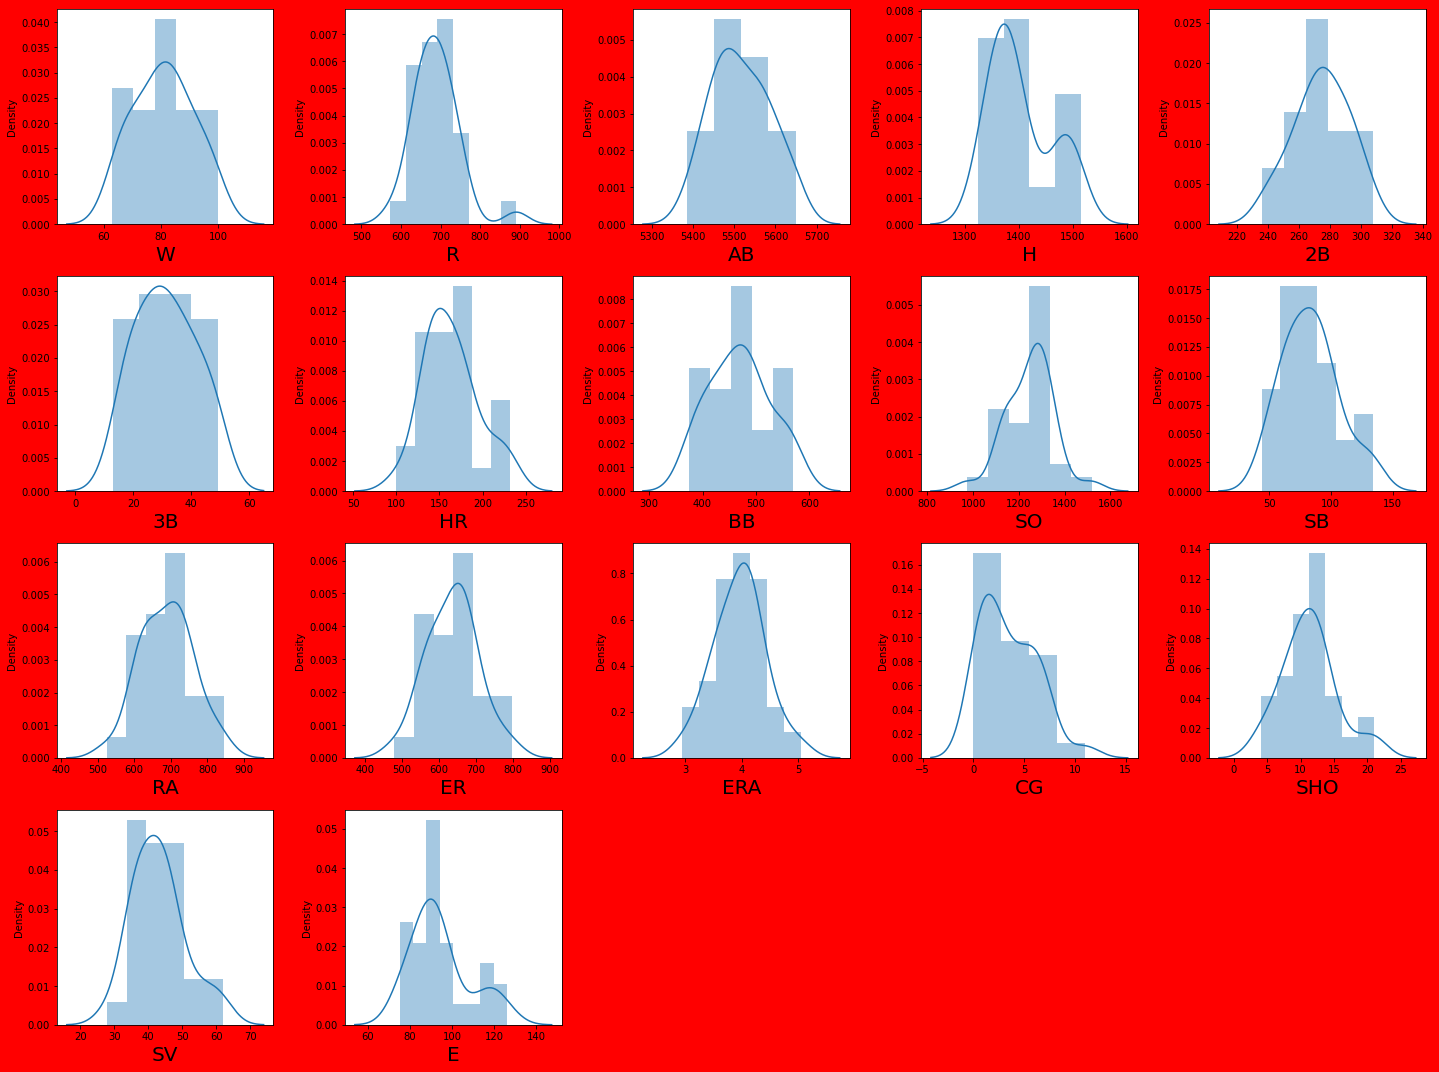

In [7]:
# Let's see how data is distributed for every column

plt.figure(figsize = (20,15), facecolor = 'red')
plotnumber = 1


for column in data :
    if plotnumber <= 17:
        ax = plt.subplot(4,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
plt.tight_layout()

The data distribution looks decent enough and there doesn't seem to be any skewness. Great let's go ahead!

Let's observe the relationship between independent variables and dependent variable.

In [8]:
# Divide data set into features and label

y = data['W']

x = data.drop(columns = ['W'])

y

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [9]:
x

R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0   724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1   696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2   669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3   622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   
4   689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   
5   891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   10   
6   764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3    4   
7   713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   10   
8   644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   12   
9   748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   10   
10  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5    9   
11  729  5459  1363  278  26  230  486  1392  121  618  572  3.57   5   13   
12  661  5417  1331  243  21  176  435  1150   52  675  630  3.94   2   12   
13  656  5544  1379  262  22  198  478  1336   69  726  677  4.16   6   12   
14  694  5600  1405  277  46  146  475  1119   78  729  664  4.14   5   15   
15  647  5484  1386  288  39  137  506  1267   69  525  478  2.94   1   15   
16  697  5631  1462  292  27  140  461  1322   98  596  532  3.21   0   13   
17  689  5491  1341  272  30  171  567  1518   95  608  546  3.36   6   21   
18  655  5480  1378  274  34  145  412  1299   84  737  682  4.28   1    7   
19  640  5571  1382  257  27  167  496  1255  134  754  700  4.33   2    8   
20  683  5527  1351  295  17  177  488  1290   51  613  557  3.43   1   14   
21  703  5428  1363  265  13  177  539  1344   57  635  577  3.62   4   13   
22  613  5463  1420  236  40  120  375  1150  112  678  638  4.02   0   12   
23  573  5420  1361  251  18  100  471  1107   69  760  698  4.41   3   10   
24  626  5529  1374  272  37  130  387  1274   88  809  749  4.69   1    7   
25  667  5385  1346  263  26  187  563  1258   59  595  553  3.44   6   21   
26  696  5565  1486  288  39  136  457  1159   93  627  597  3.72   7   18   
27  720  5649  1494  289  48  154  490  1312  132  713  659  4.04   1   12   
28  650  5457  1324  260  36  148  426  1327   82  731  655  4.09   1    6   
29  737  5572  1479  274  49  186  388  1283   97  844  799  5.04   4    4   

    SV    E  
0   56   88  
1   45   86  
2   38   79  
3   37  101  
4   35   86  
5   34   88  
6   48   93  
7   43   77  
8   60   95  
9   40   97  
10  45  119  
11  39   85  
12  46   93  
13  45   94  
14  28  126  
15  62   96  
16  54  122  
17  48  111  
18  40  116  
19  35   90  
20  50   88  
21  41   90  
22  35   77  
23  44   90  
24  35  117  
25  47   75  
26  41   78  
27  44   86  
28  41   92  
29  36   95

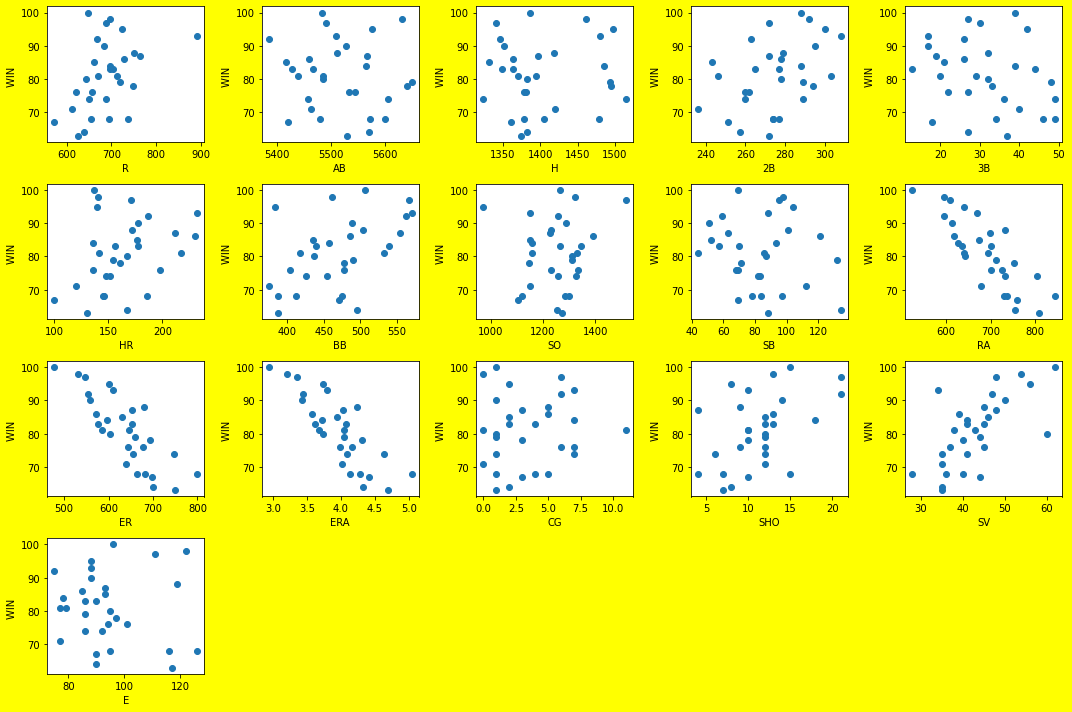

In [10]:
# Visualizing relationship

plt.figure(figsize = (15,10), facecolor = 'yellow')
plotnumber =1

for column in x :
    if plotnumber<=17:
        ax = plt.subplot(4,5,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('WIN ',fontsize = 10)
    plotnumber+=1
plt.tight_layout()

In [11]:
# create X =feature and y = label

x= data [['R']]
y = data.W


# follow the usual sklearn pattern: import, instantiate,fit


from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(x,y)

LinearRegression()

In [12]:
# print intercept and coefficients

print(lm.intercept_)
print(lm.coef_)

28.22830728137677
[0.0766286]


In [13]:
# Calculate the prediction 

28.22830728137677 + 0.0766286 * 50

32.05973728137677

In [14]:
from sklearn.metrics import r2_score

In [15]:
predicted_Wins =lm.predict(x)

In [16]:
x.head()

R
0  724
1  696
2  669
3  622
4  689

In [17]:
predicted_Wins

array([83.70741639, 81.56181549, 79.49284319, 75.89129881, 81.02541526,
       96.50439322, 86.77256054, 82.86450175, 77.57712809, 85.54650288,
       85.7763887 , 84.09055941, 78.87981436, 78.49667134, 81.40855828,
       77.80701391, 81.63844409, 81.02541526, 78.42004274, 77.27061368,
       80.56564364, 82.09821572, 75.20164138, 72.13649723, 76.19781323,
       79.33958598, 81.56181549, 83.40090198, 78.03689972, 84.70358824])

# Q.2

## Avocado Project

### Project Description

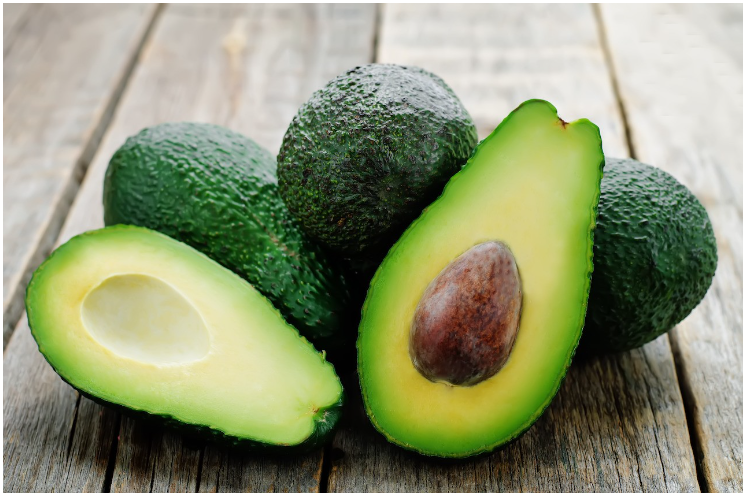

#### The table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g.greenskins) are not included in this table.

In [18]:
df = pd.read_csv("avocado.csv")
df

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

In [19]:
df.drop('Unnamed: 0',inplace = True , axis = 1) # for drop the Unnamed: column  which has no effect on dataset.

df.head()    # for print first dataset.

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

In [20]:
# checking the total no. of rows and column
df.shape

(18249, 13)

In [21]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [22]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

- *As seen in data set there is one index column which does not play any important role for prediction in the price of avocado, so I am dropping that column*.

- *Also, I am checking the shape of the data set as there are 18249 rows and 13 columns after deleting the index column*.

- *Also, most of the column are of same data type that is float and Date, type and region is of object data type*.

<AxesSubplot:>

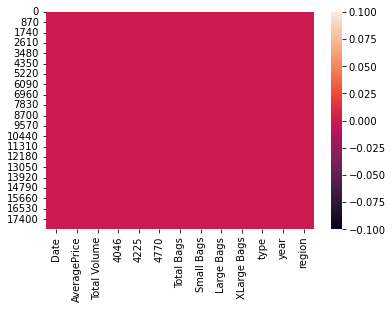

In [23]:
sns.heatmap(df.isnull())

In [24]:
# checking the mean of price at each year  of Avacado

df.groupby('year')['AveragePrice'].mean()

year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

In [25]:
# finding how much type of avacado is sell in last 4 year

df.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

In [26]:
df.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          year  
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000  
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   2016.147899  
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.939938  
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000  
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000   2015.000000  
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000   2016.000000  
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000   2017.000000  
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   2018.000000

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

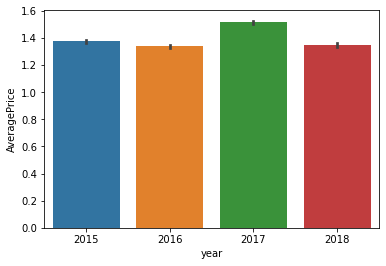

In [27]:
sns.barplot(x = 'year',y = 'AveragePrice',data = df)

<AxesSubplot:xlabel='AveragePrice'>

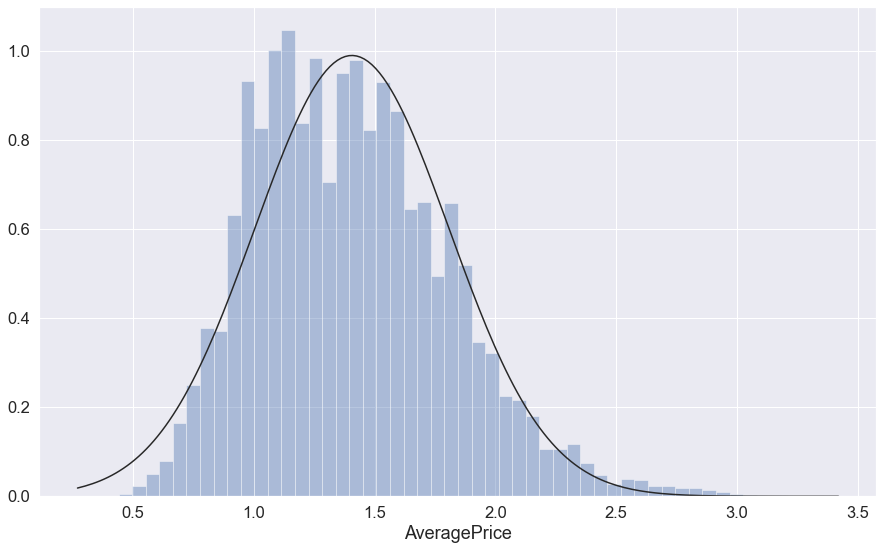

In [28]:
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df.AveragePrice, kde=False, fit=norm)

Text(0.5, 1.0, 'yearly Average Price in Each Region')

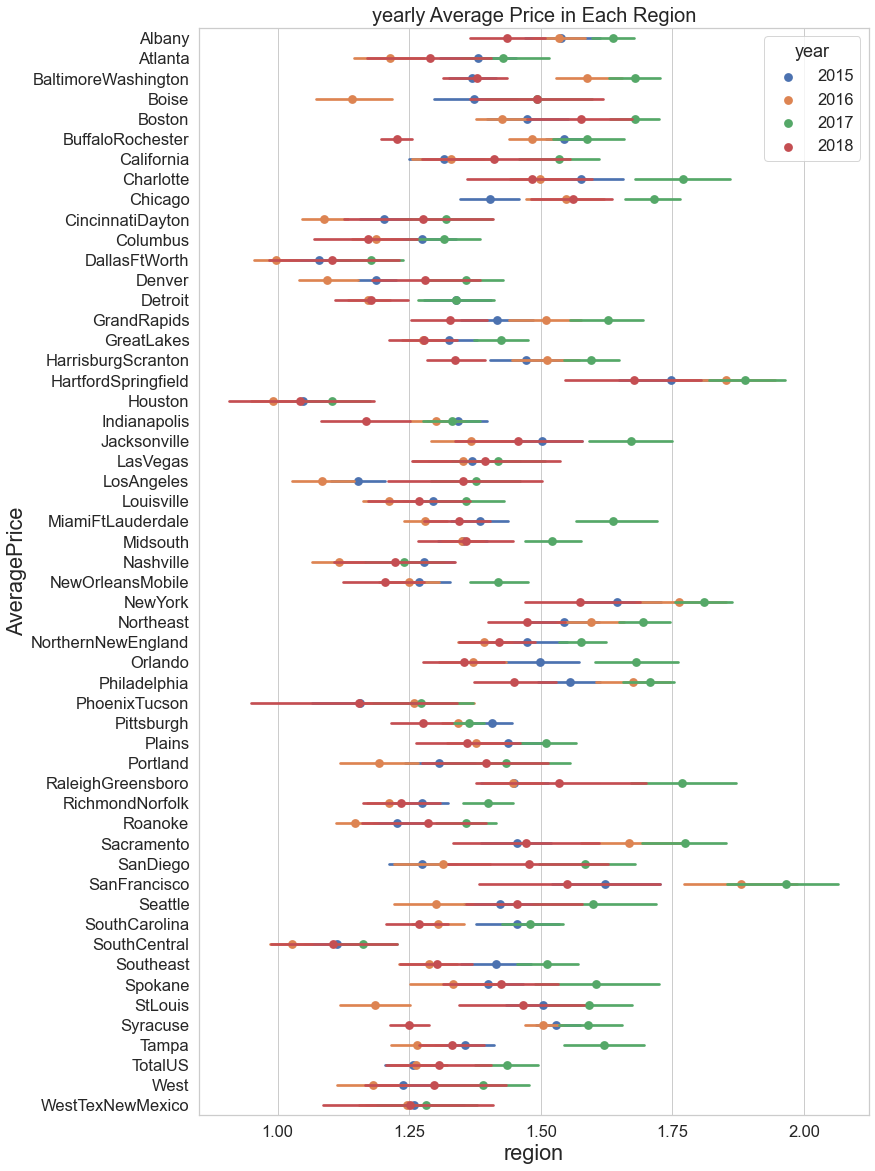

In [29]:

plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice',y='region',data=df, hue='year',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('region',{'fontsize' : 'large'})
plt.ylabel('AveragePrice',{'fontsize':'large'})
plt.title("yearly Average Price in Each Region",{'fontsize':20})

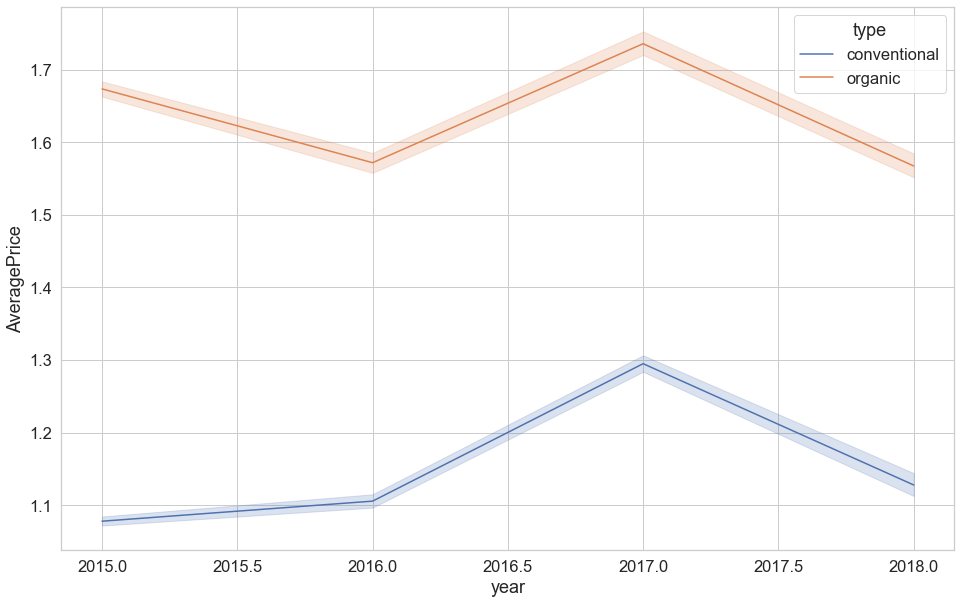

In [30]:
plt.figure(figsize = (16,10))

sns.lineplot(x = 'year',y = 'AveragePrice',hue = 'type',data = df)

plt.show()

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>],
       [<AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>],
       [<AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

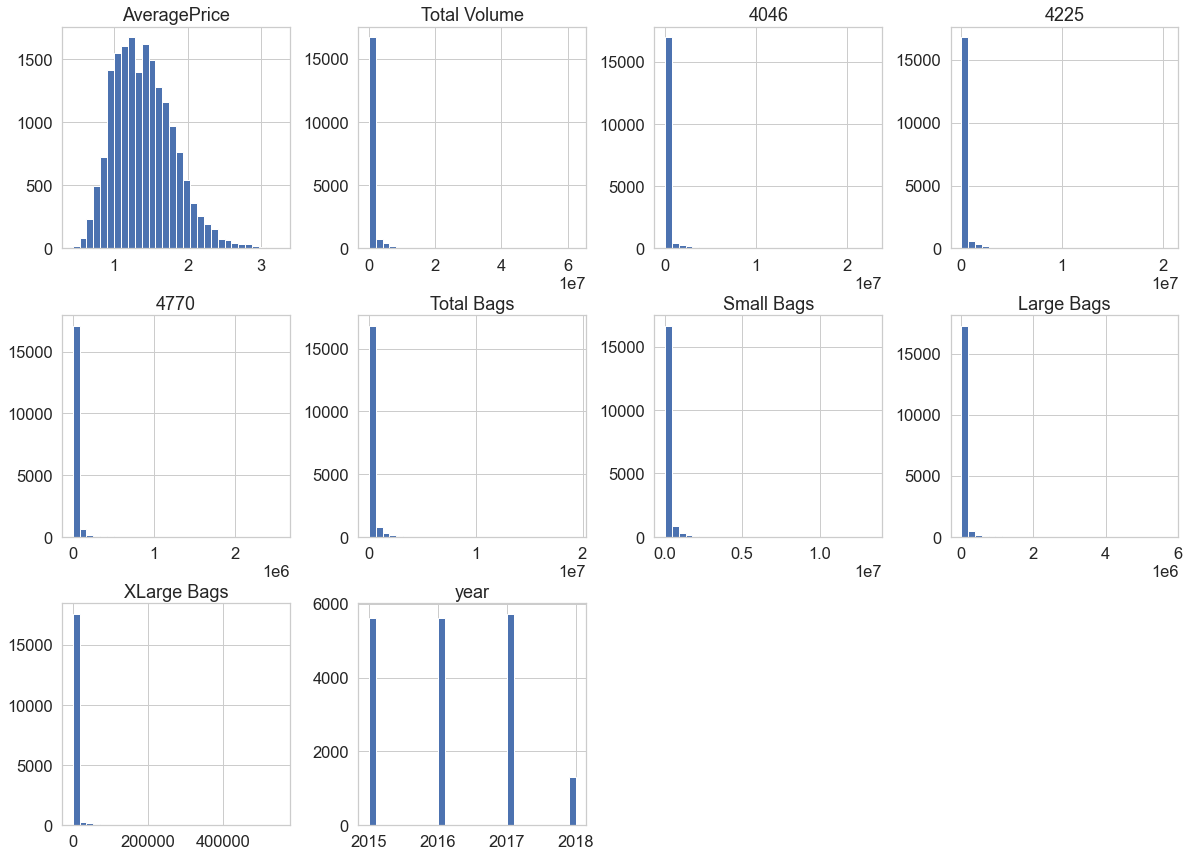

In [31]:
# plotting histogram for univariate analysis and chcking the normal distribution

df.hist(figsize = (20,20), grid = True,layout = (4,4),bins = 30)

[]

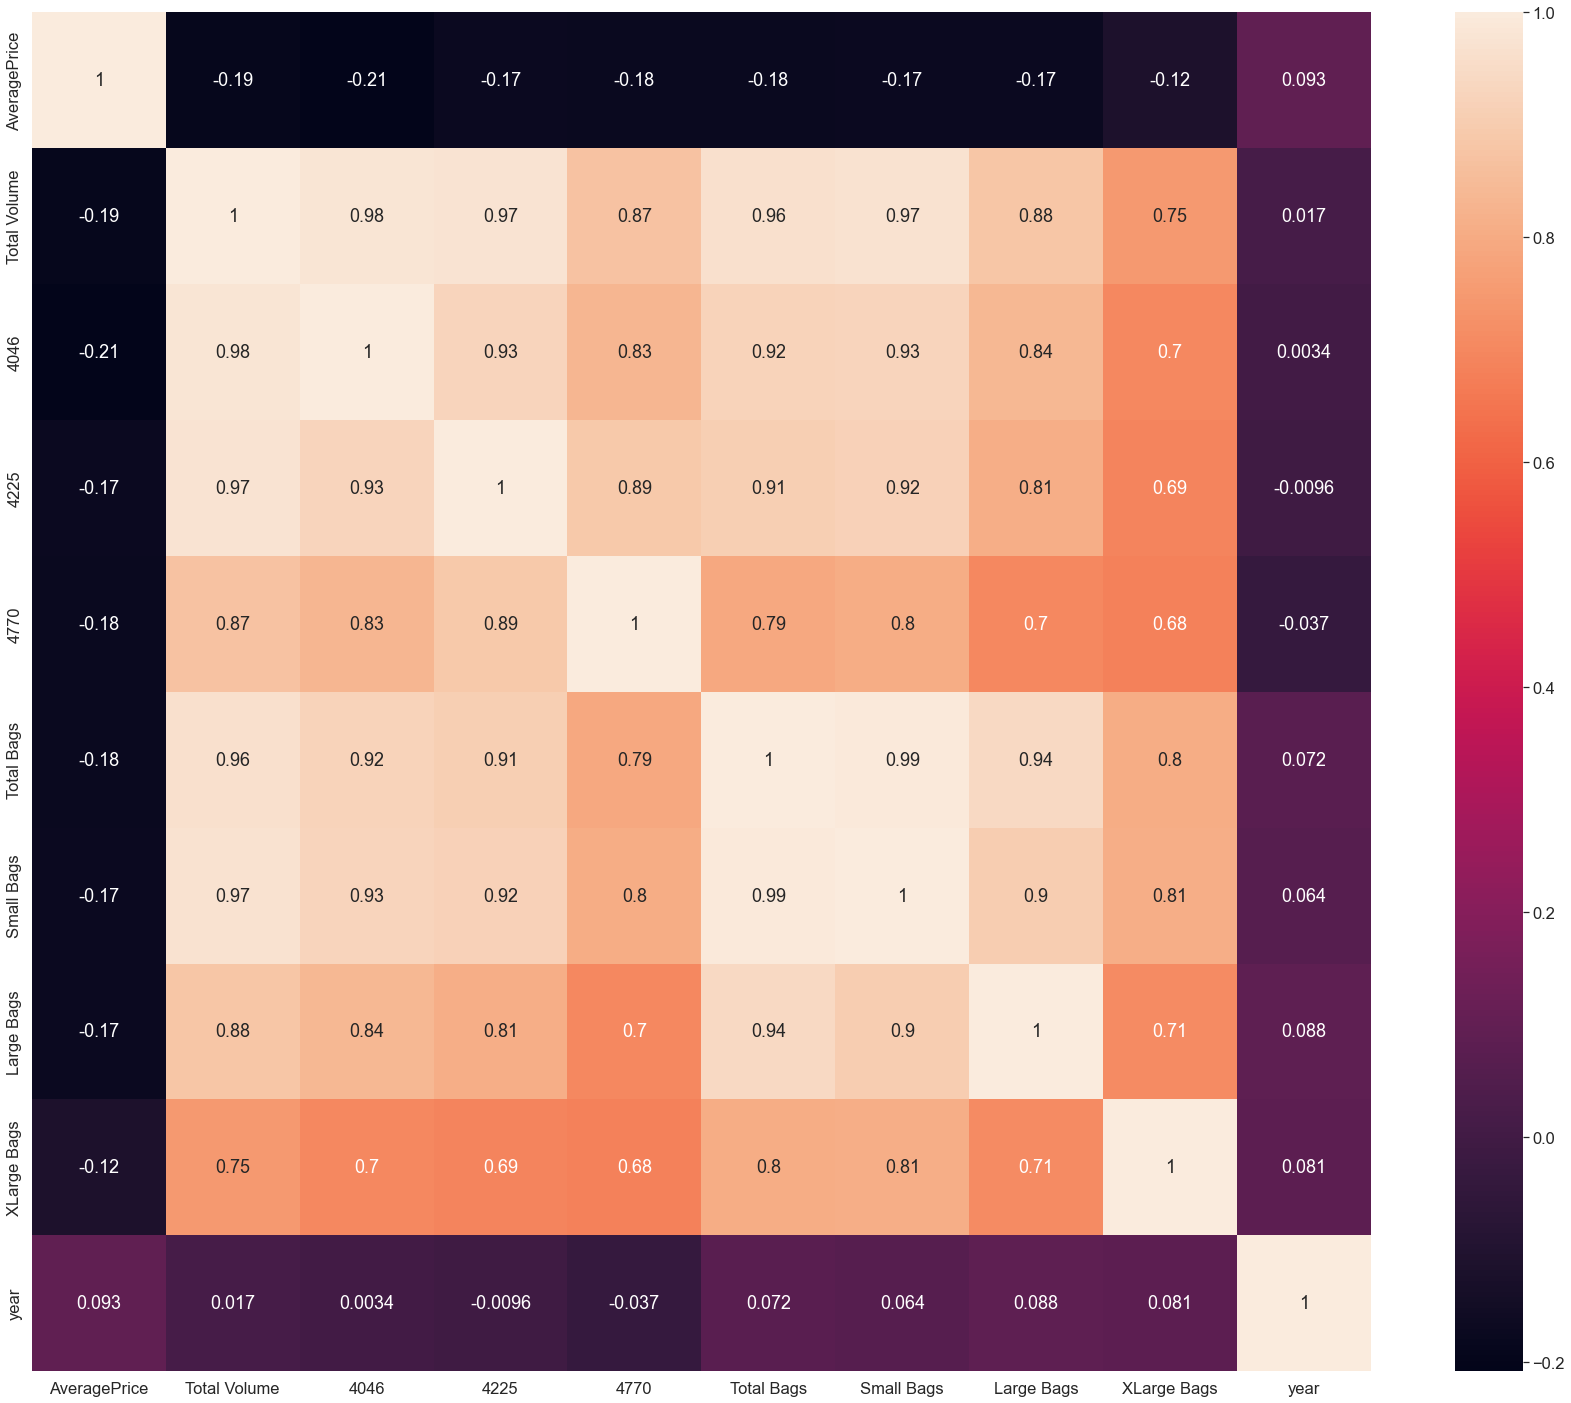

In [32]:
# checking the co-relation of all column to each other

df_cor = df.corr()

plt.figure(figsize = (30,25))

sns.heatmap(df_cor,annot = True)

plt.plot()

In [33]:
# importing Libraries for classification predction
from sklearn.ensemble import RandomForestClassifier

In [34]:
X=df[['AveragePrice','Total Volume','4046','4225','4770','Total Bags', 'Large Bags', 'XLarge Bags']] #feature columns
y=df.type #predictor variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print("X Train Shape ",X_train.shape)
print("Y Train Shape ",y_train.shape)

print("X Test Shape ",X_test.shape)
print("Y Test Shape ",y_test.shape)

X Train Shape  (14599, 8)
Y Train Shape  (14599,)
X Test Shape  (3650, 8)
Y Test Shape  (3650,)


# Q 3

### HR Analytics Project- Understanding the Attrition in HR

###### Employee attrition analytics is specifically focused on identifying why employees voluntarily leave, what might have prevented them from leaving, and how we can use data to predict attrition risk

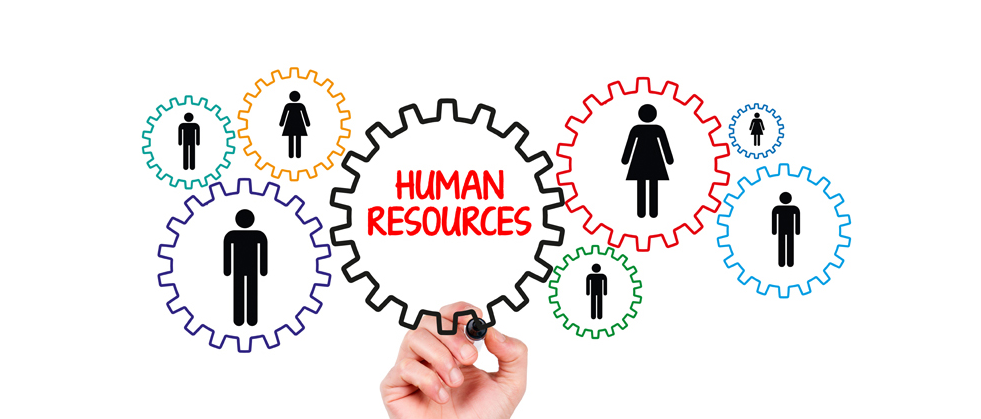

In [35]:
HR = pd.read_csv("HR_Analytics.csv")
HR.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [36]:
# checking the total no. of rows and column
HR.shape

(1470, 35)

In [37]:
HR.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [38]:
HR.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [39]:
HR.isnull().any().any()

False

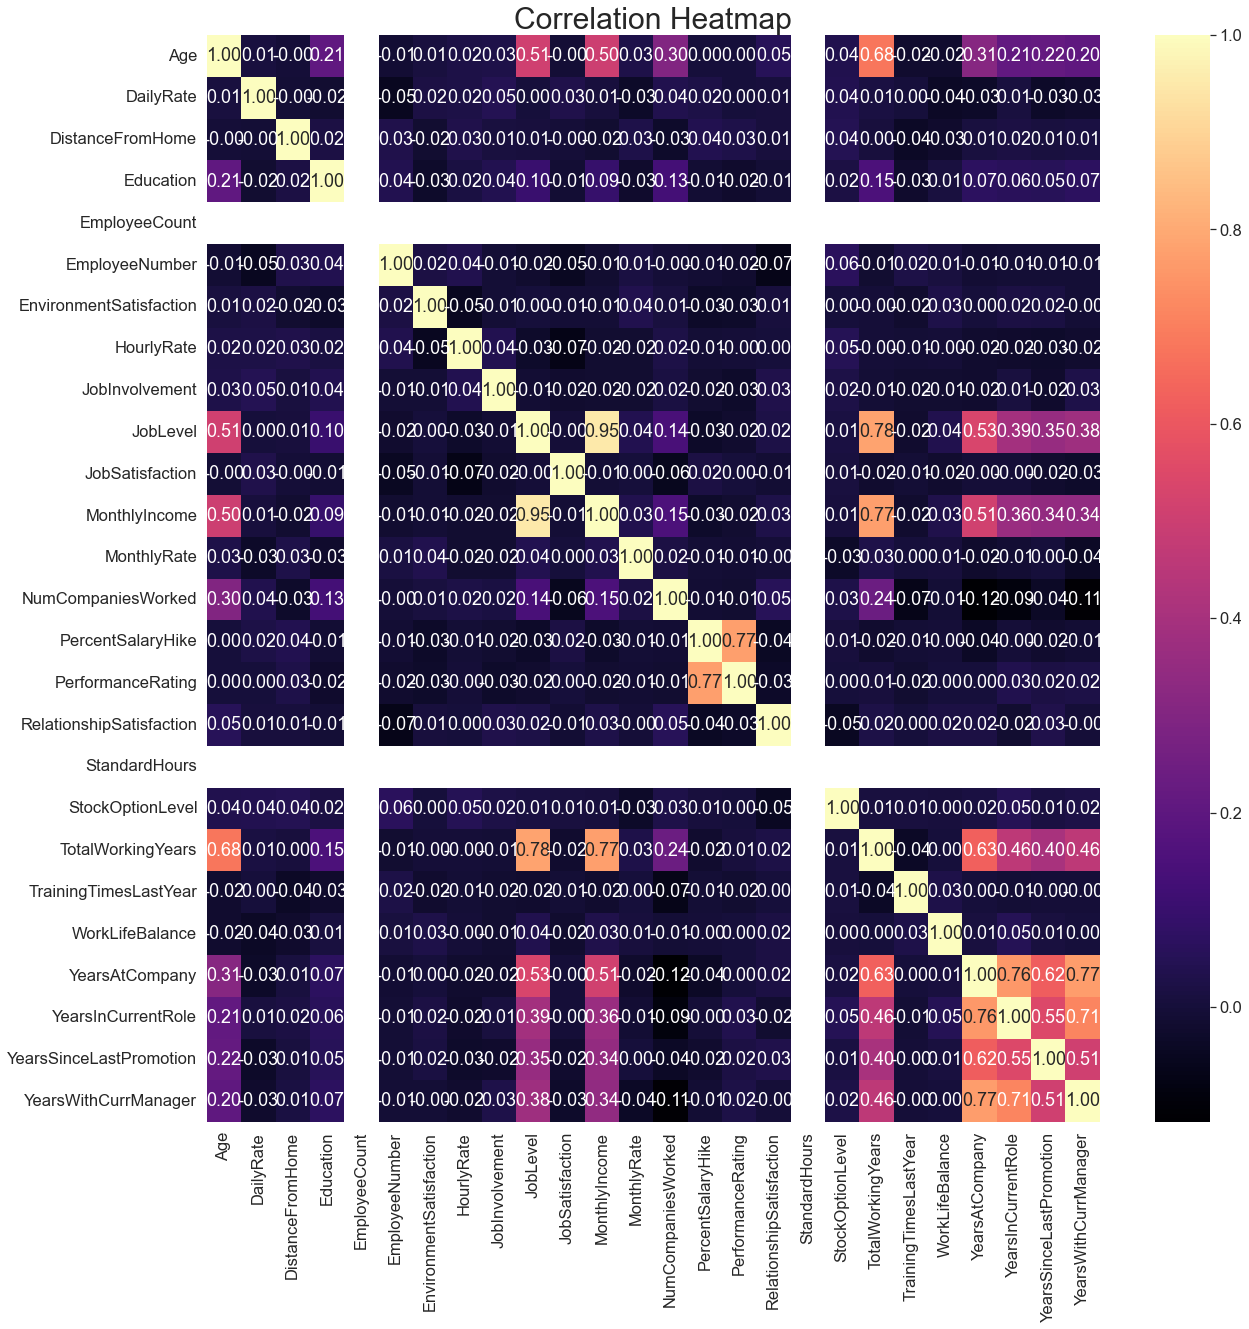

In [40]:
plt.figure(figsize=(20,20))
sns.heatmap(HR.corr(), annot=True, fmt='.2f', cmap='magma')
plt.title('Correlation Heatmap', fontsize=30)
plt.show()

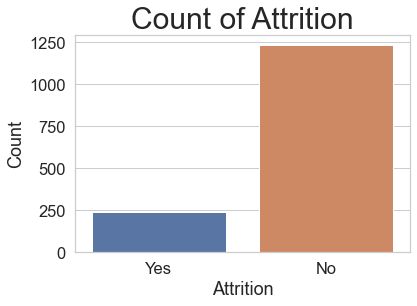

In [41]:
sns.countplot('Attrition', data=HR)
plt.title('Count of Attrition', fontsize=30)
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

In [42]:
categorical_cols = [feature for feature in HR.columns if HR[feature].dtypes=='object']
HR[categorical_cols].sample(5)

Attrition     BusinessTravel              Department EducationField  \
792        Yes  Travel_Frequently  Research & Development        Medical   
915        Yes  Travel_Frequently  Research & Development  Life Sciences   
1410        No      Travel_Rarely                   Sales      Marketing   
592         No      Travel_Rarely  Research & Development          Other   
667        Yes      Travel_Rarely  Research & Development  Life Sciences   

      Gender                JobRole MaritalStatus Over18 OverTime  
792   Female     Research Scientist        Single      Y       No  
915   Female  Laboratory Technician        Single      Y       No  
1410  Female        Sales Executive       Married      Y       No  
592   Female                Manager       Married      Y      Yes  
667   Female  Laboratory Technician      Divorced      Y      Yes

In [43]:
numerical_cols = [feature for feature in df.columns if df[feature].dtypes!='object']
df[numerical_cols].sample(5)

AveragePrice  Total Volume      4046       4225      4770  Total Bags  \
10605          2.20      13745.40   2236.68    9080.28     68.20     2360.24   
11406          1.50      35183.30  13839.32   20645.52     83.21      615.25   
5076           0.83     844349.33  87749.32  218295.82  12759.69   525544.50   
7657           1.21     251831.45  70138.76   97759.86   1913.81    82019.02   
10869          1.48      14656.29  11743.35    1864.94      0.00     1048.00   

       Small Bags  Large Bags  XLarge Bags  year  
10605     2360.24        0.00         0.00  2015  
11406        0.00      615.25         0.00  2015  
5076    523711.87     1383.28       449.35  2016  
7657     71831.35     4301.84      5885.83  2017  
10869      736.67      311.33         0.00  2015

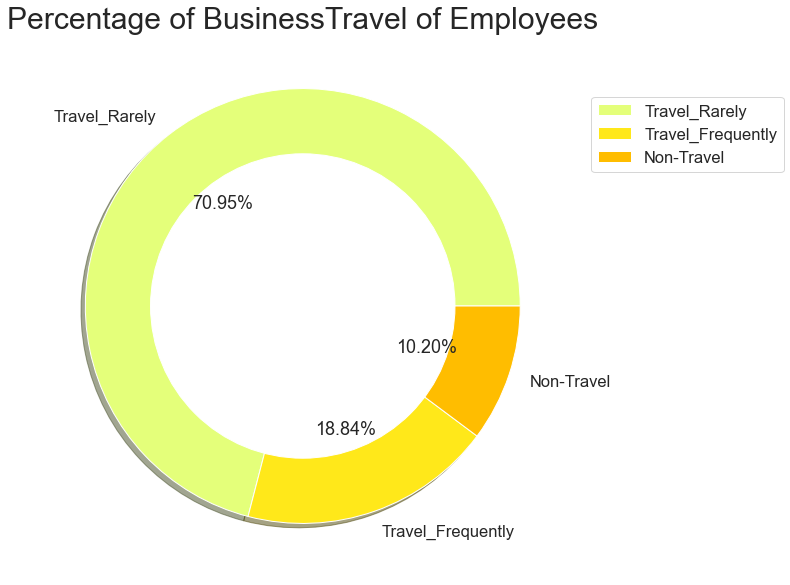

In [44]:
size = HR['BusinessTravel'].value_counts()
labels = HR['BusinessTravel'].unique()
colors = plt.cm.Wistia(np.linspace(0,1,5))

plt.figure(figsize=(10,10))
circle = plt.Circle((0,0), radius=0.7, color='white')
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
p = plt.gcf()
p.gca().add_artist(circle)
plt.title('Percentage of BusinessTravel of Employees', fontsize=30)
plt.legend(bbox_to_anchor=(0.5, 0., 0.9, 0.9));

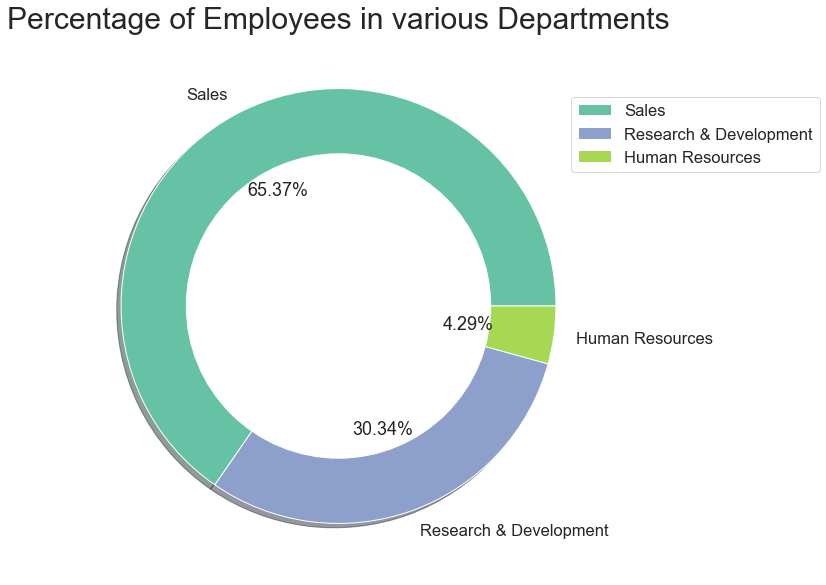

In [45]:
size = HR['Department'].value_counts()
labels = HR['Department'].unique()
colors = plt.cm.Set2(np.linspace(0,1,5))

plt.figure(figsize=(10,10))
circle = plt.Circle((0,0), radius=0.7, color='white')
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
p = plt.gcf()
p.gca().add_artist(circle)
plt.title('Percentage of Employees in various Departments', fontsize=30)
plt.legend(bbox_to_anchor=(0.5, 0., 0.9, 0.9));

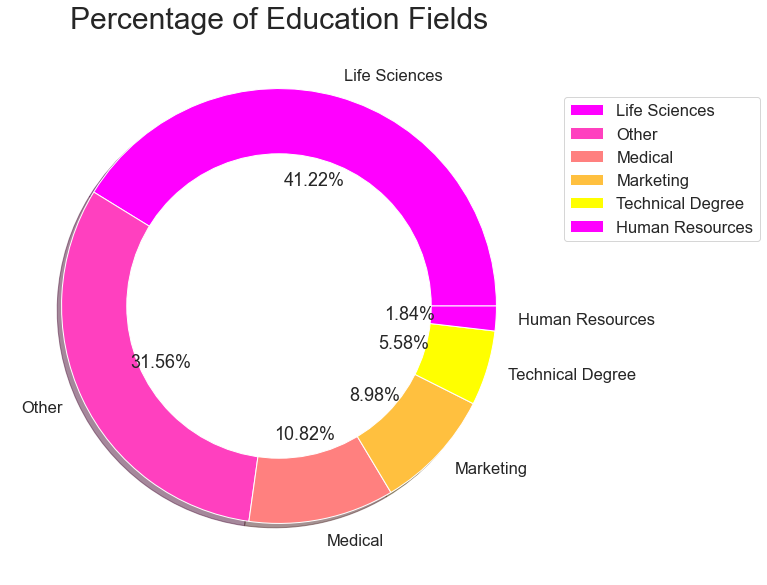

In [46]:
size = HR['EducationField'].value_counts()
labels = HR['EducationField'].unique()
colors = plt.cm.spring(np.linspace(0,1,5))

plt.figure(figsize=(10,10))
circle = plt.Circle((0,0), radius=0.7, color='white')
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
p = plt.gcf()
p.gca().add_artist(circle)
plt.title('Percentage of Education Fields', fontsize=30)
plt.legend(bbox_to_anchor=(0.5, 0., 0.9, 0.9));

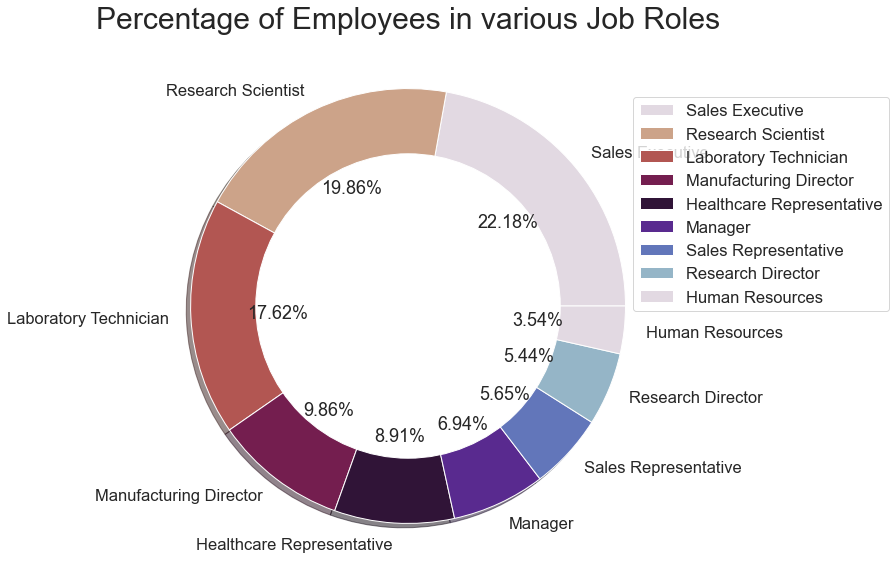

In [47]:
size = HR['JobRole'].value_counts()
labels = HR['JobRole'].unique()
colors = plt.cm.twilight_r(np.linspace(0,1,9))

plt.figure(figsize=(10,10))
circle = plt.Circle((0,0), radius=0.7, color='white')
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
p = plt.gcf()
p.gca().add_artist(circle)
plt.title('Percentage of Employees in various Job Roles', fontsize=30)
plt.legend(bbox_to_anchor=(0.5, 0., 0.9, 0.9));

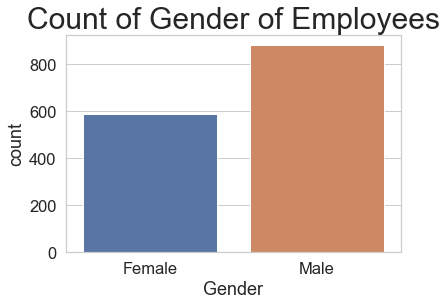

In [48]:
sns.countplot('Gender', data=HR)
plt.title('Count of Gender of Employees', fontsize=30)
plt.xlabel('Gender')
plt.show()

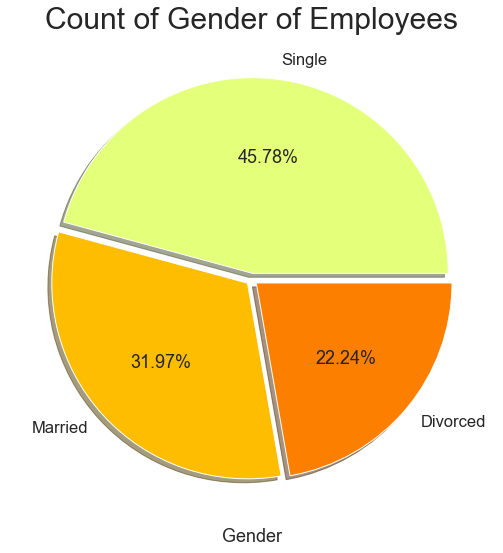

In [49]:
size=HR['MaritalStatus'].value_counts()
labels=HR['MaritalStatus'].unique()
colors=plt.cm.Wistia(np.linspace(0,1,3))
explode = [0.03, 0.03, 0.03]

plt.figure(figsize=(9,9))
plt.pie(size, colors=colors, labels=labels, explode=explode, autopct='%.2f%%', shadow=True)
plt.title('Count of Gender of Employees', fontsize=30)
plt.xlabel('Gender')
plt.show()

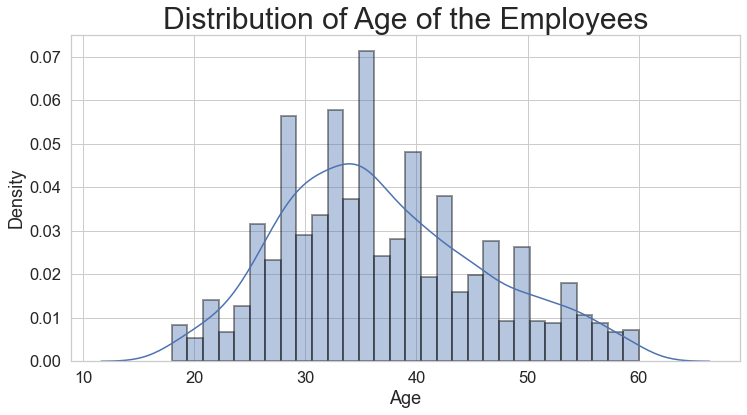

In [50]:
plt.figure(figsize=(12,6))
sns.distplot(HR['Age'], bins=30, hist_kws=dict(edgecolor='black', linewidth=2))
plt.title('Distribution of Age of the Employees', fontsize=30)
plt.xlabel('Age')
plt.show()

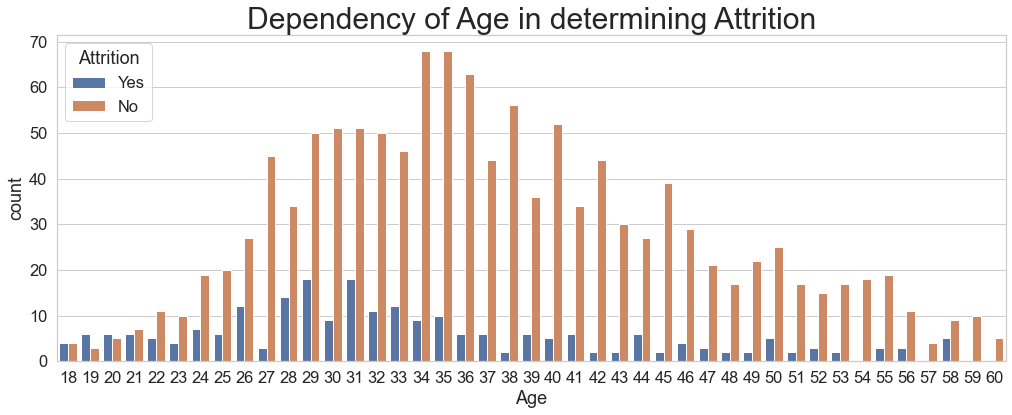

In [51]:
plt.figure(figsize=(17,6))
sns.countplot('Age', hue='Attrition', data=HR)
plt.title('Dependency of Age in determining Attrition', fontsize=30)
plt.xlabel('Age')
plt.show()

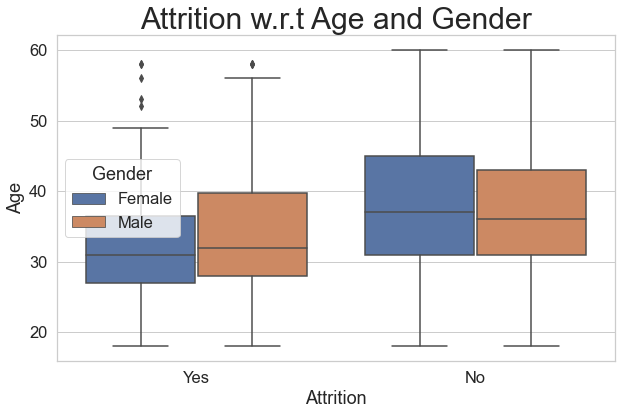

In [52]:
plt.figure(figsize=(10,6))
sns.boxplot('Attrition', 'Age', hue='Gender', data=HR)
plt.title('Attrition w.r.t Age and Gender', fontsize=30)
plt.xlabel('Attrition')
plt.show()

<Figure size 1368x432 with 0 Axes>

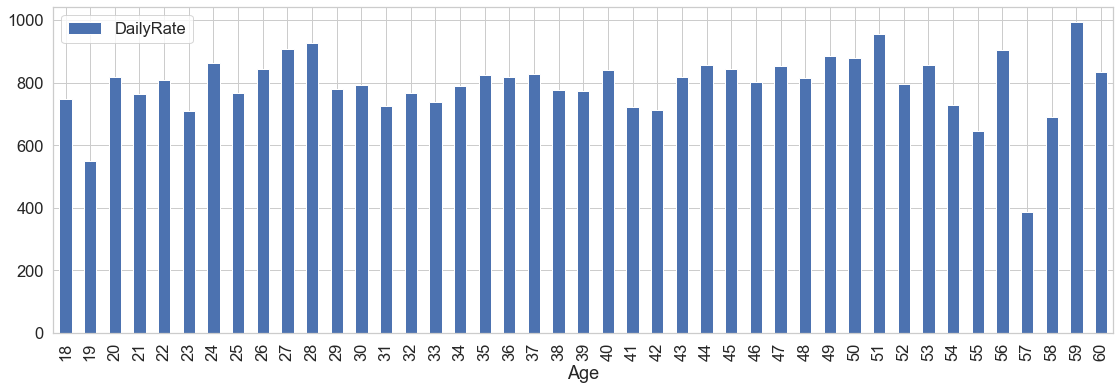

In [53]:
plt.figure(figsize=(19,6))
x = HR[['Age', 'DailyRate']].groupby('Age').mean()
x = pd.DataFrame(x)
x.sort_values(by = 'Age').plot(kind='bar', figsize=(19,6));

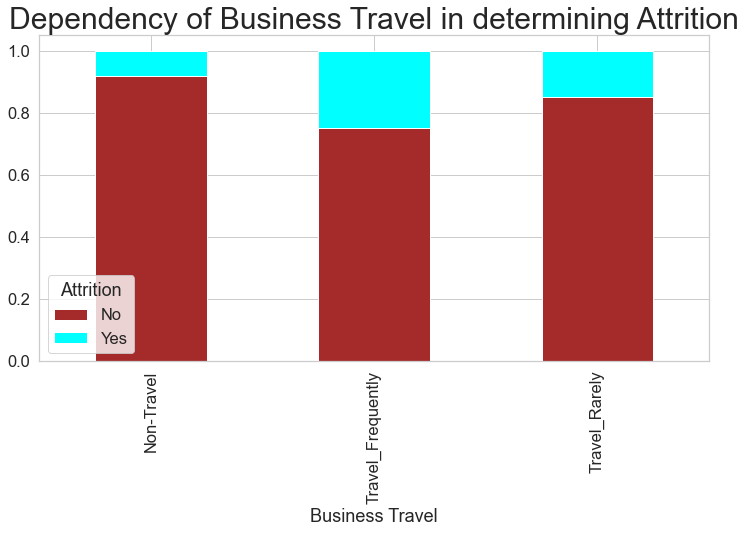

In [54]:
source=pd.crosstab(HR['BusinessTravel'], HR['Attrition'])
source.div(source.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['brown', 'cyan'], 
                                                figsize=(12,6))
plt.title('Dependency of Business Travel in determining Attrition', fontsize=30)
plt.xlabel('Business Travel')
plt.show()

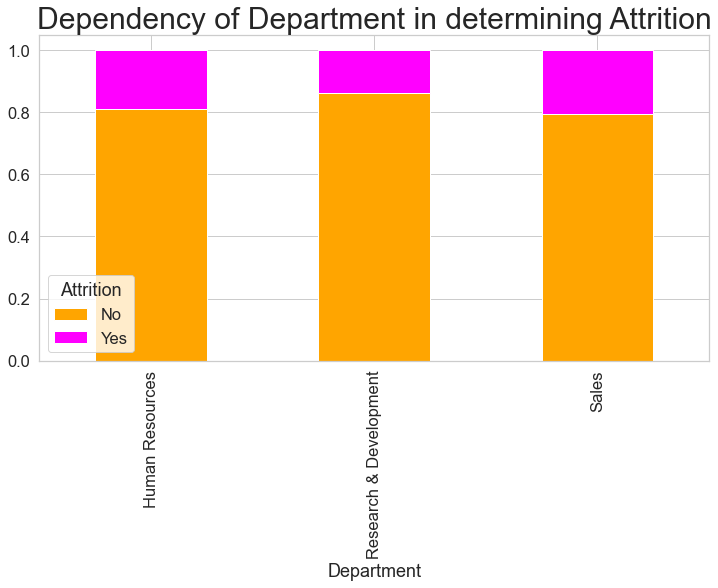

In [55]:
source=pd.crosstab(HR['Department'], HR['Attrition'])
source.div(source.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['orange', 'magenta'], 
                                                figsize=(12,6))
plt.title('Dependency of Department in determining Attrition', fontsize=30)
plt.xlabel('Department')
plt.show()

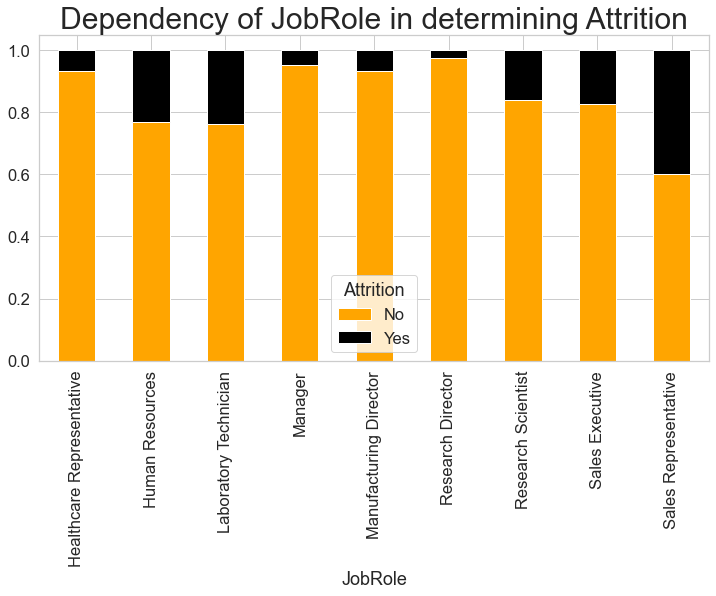

In [56]:
source=pd.crosstab(HR['JobRole'], HR['Attrition'])
source.div(source.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['orange', 'black'], 
                                                figsize=(12,6))
plt.title('Dependency of JobRole in determining Attrition', fontsize=30)
plt.xlabel('JobRole')
plt.show()

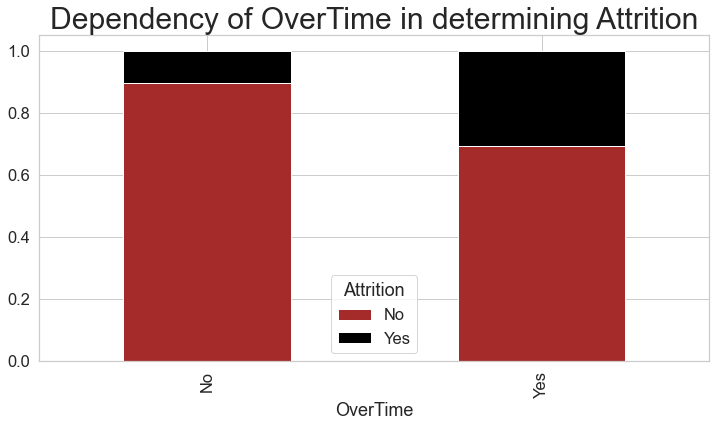

In [57]:
source=pd.crosstab(HR['OverTime'], HR['Attrition'])
source.div(source.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['brown', 'black'], 
                                                figsize=(12,6))
plt.title('Dependency of OverTime in determining Attrition', fontsize=30)
plt.xlabel('OverTime')
plt.show()

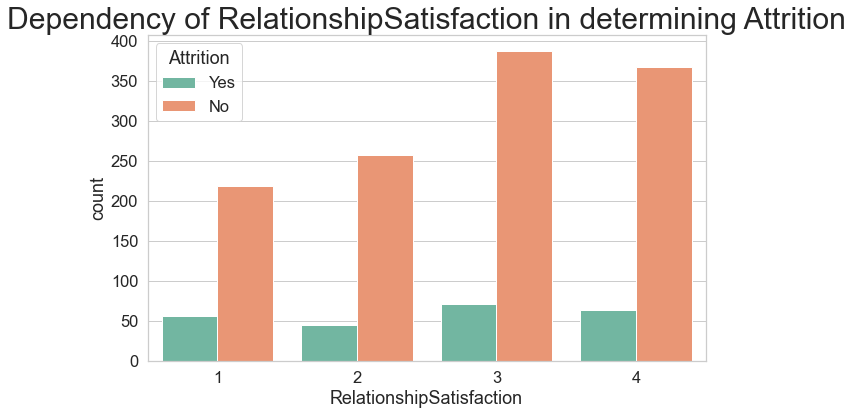

In [58]:
plt.figure(figsize=(10,6))
sns.countplot('RelationshipSatisfaction', hue='Attrition', data=HR, palette='Set2')
plt.title('Dependency of RelationshipSatisfaction in determining Attrition', fontsize=30)
plt.xlabel('RelationshipSatisfaction')
plt.show()

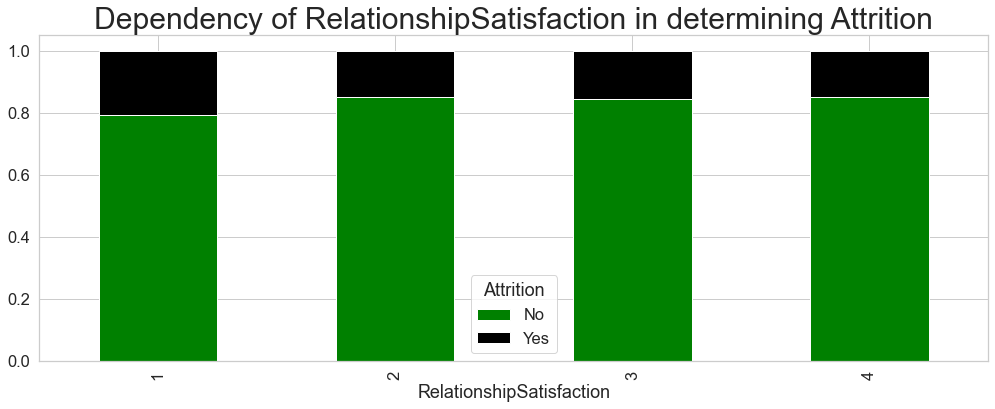

In [59]:
source=pd.crosstab(HR['RelationshipSatisfaction'], HR['Attrition'])
source.div(source.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['green', 'black'], 
                                                figsize=(17,6))
plt.title('Dependency of RelationshipSatisfaction in determining Attrition', fontsize=30)
plt.xlabel('RelationshipSatisfaction')
plt.show()

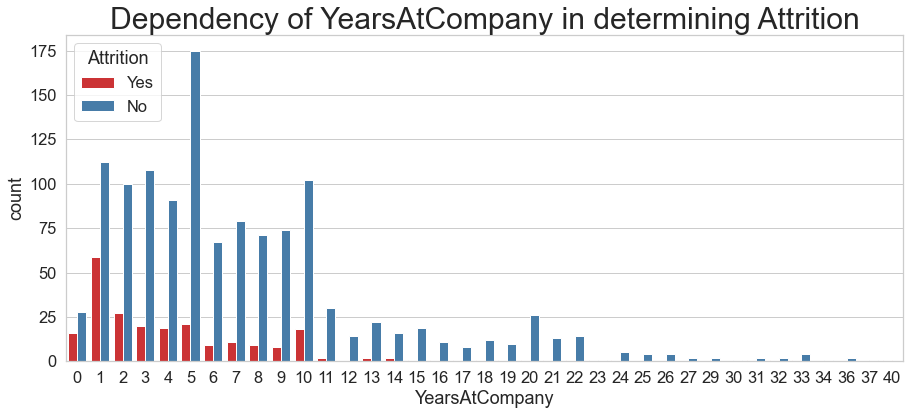

In [60]:
plt.figure(figsize=(15,6))
sns.countplot('YearsAtCompany', hue='Attrition', data=HR, palette='Set1')
plt.title('Dependency of YearsAtCompany in determining Attrition', fontsize=30)
plt.xlabel('YearsAtCompany')
plt.show()

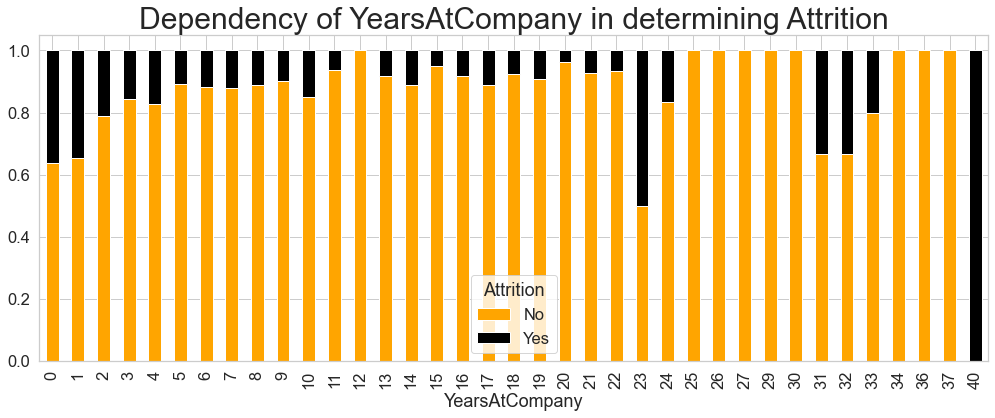

In [61]:
source=pd.crosstab(HR['YearsAtCompany'], HR['Attrition'])
source.div(source.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['orange', 'black'], 
                                                figsize=(17,6))
plt.title('Dependency of YearsAtCompany in determining Attrition', fontsize=30)
plt.xlabel('YearsAtCompany')
plt.show()

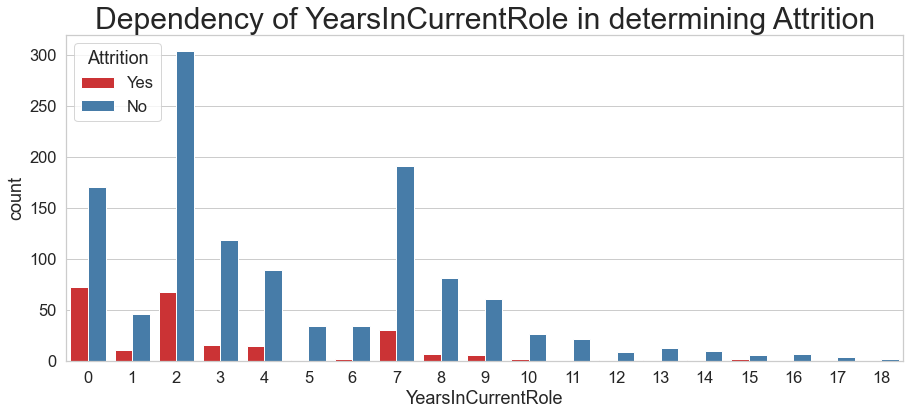

In [62]:
plt.figure(figsize=(15,6))
sns.countplot('YearsInCurrentRole', hue='Attrition', data=HR, palette='Set1')
plt.title('Dependency of YearsInCurrentRole in determining Attrition', fontsize=30)
plt.xlabel('YearsInCurrentRole')
plt.show()

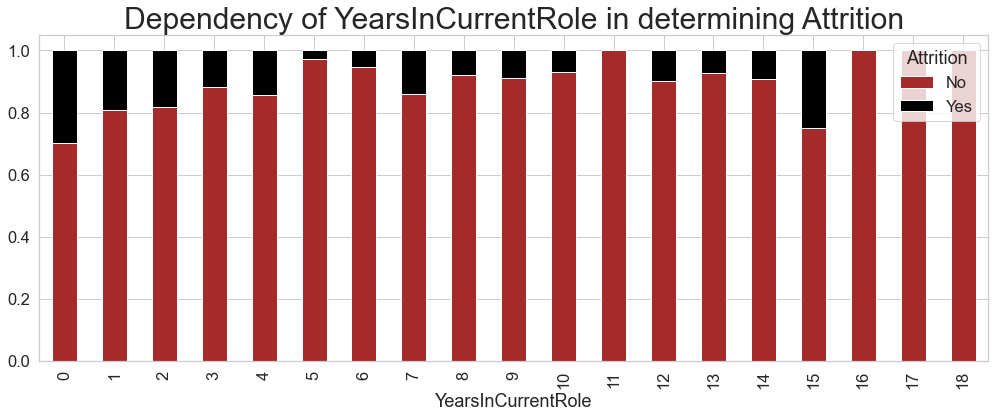

In [63]:
source=pd.crosstab(HR['YearsInCurrentRole'], HR['Attrition'])
source.div(source.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['brown', 'black'], 
                                                figsize=(17,6))
plt.title('Dependency of YearsInCurrentRole in determining Attrition', fontsize=30)
plt.xlabel('YearsInCurrentRole')
plt.show()

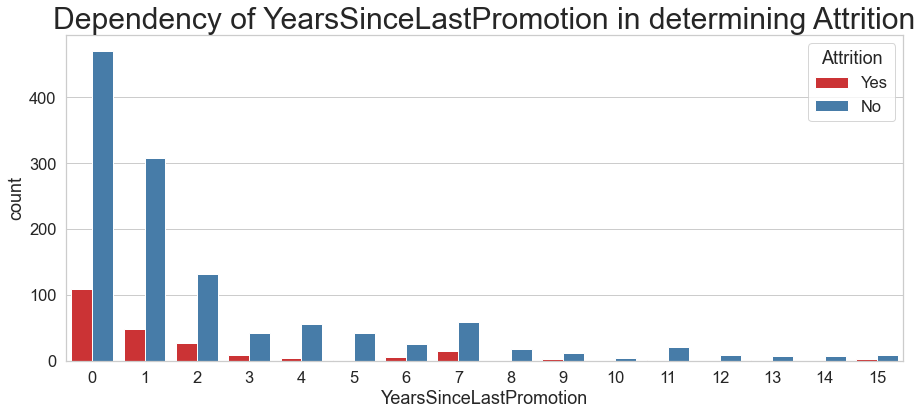

In [64]:
plt.figure(figsize=(15,6))
sns.countplot('YearsSinceLastPromotion', hue='Attrition', data=HR, palette='Set1')
plt.title('Dependency of YearsSinceLastPromotion in determining Attrition', fontsize=30)
plt.xlabel('YearsSinceLastPromotion')
plt.show()

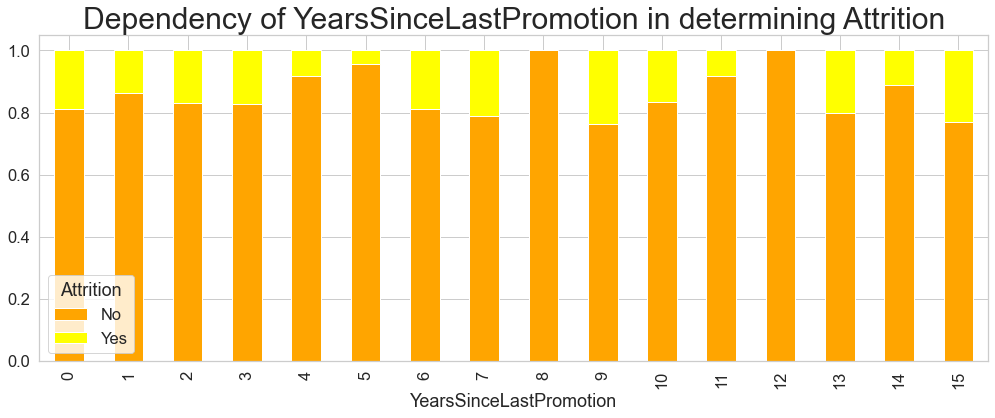

In [65]:
source=pd.crosstab(HR['YearsSinceLastPromotion'], HR['Attrition'])
source.div(source.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['orange', 'yellow'], 
                                                figsize=(17,6))
plt.title('Dependency of YearsSinceLastPromotion in determining Attrition', fontsize=30)
plt.xlabel('YearsSinceLastPromotion')
plt.show()

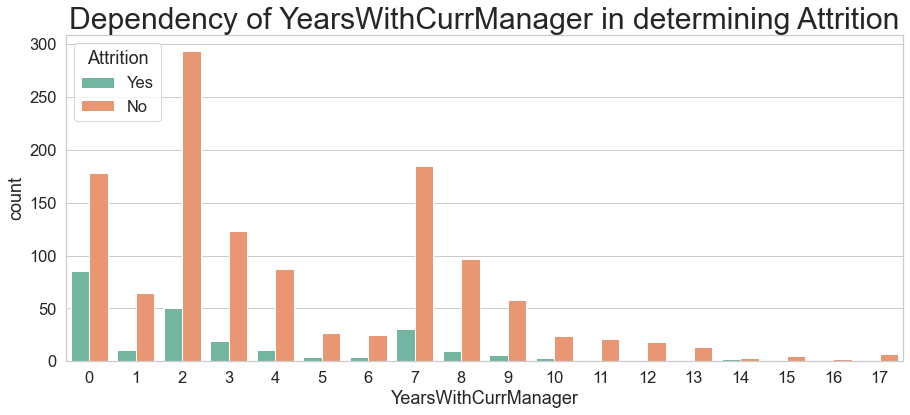

In [66]:
plt.figure(figsize=(15,6))
sns.countplot('YearsWithCurrManager', hue='Attrition', data=HR, palette='Set2')
plt.title('Dependency of YearsWithCurrManager in determining Attrition', fontsize=30)
plt.xlabel('YearsWithCurrManager')
plt.show()

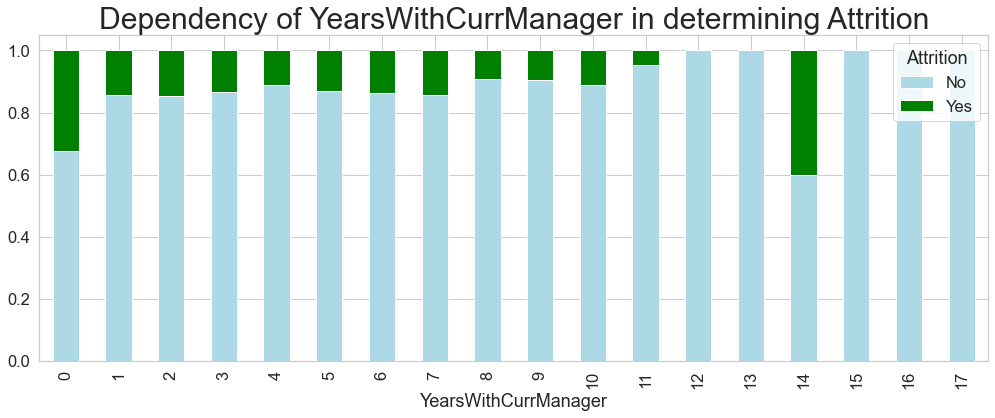

In [67]:
source=pd.crosstab(HR['YearsWithCurrManager'], HR['Attrition'])
source.div(source.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['lightblue', 'green'], 
                                                figsize=(17,6))
plt.title('Dependency of YearsWithCurrManager in determining Attrition', fontsize=30)
plt.xlabel('YearsWithCurrManager')
plt.show()

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EmployeeCount'}>],
       [<AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>],
       [<AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>],
       [<AxesSubplot:title={'center':'PerformanceRating'}>,
        <AxesSubplot:title={'center':'RelationshipSatisfaction'}>,
        <AxesSubplot:title={'cen

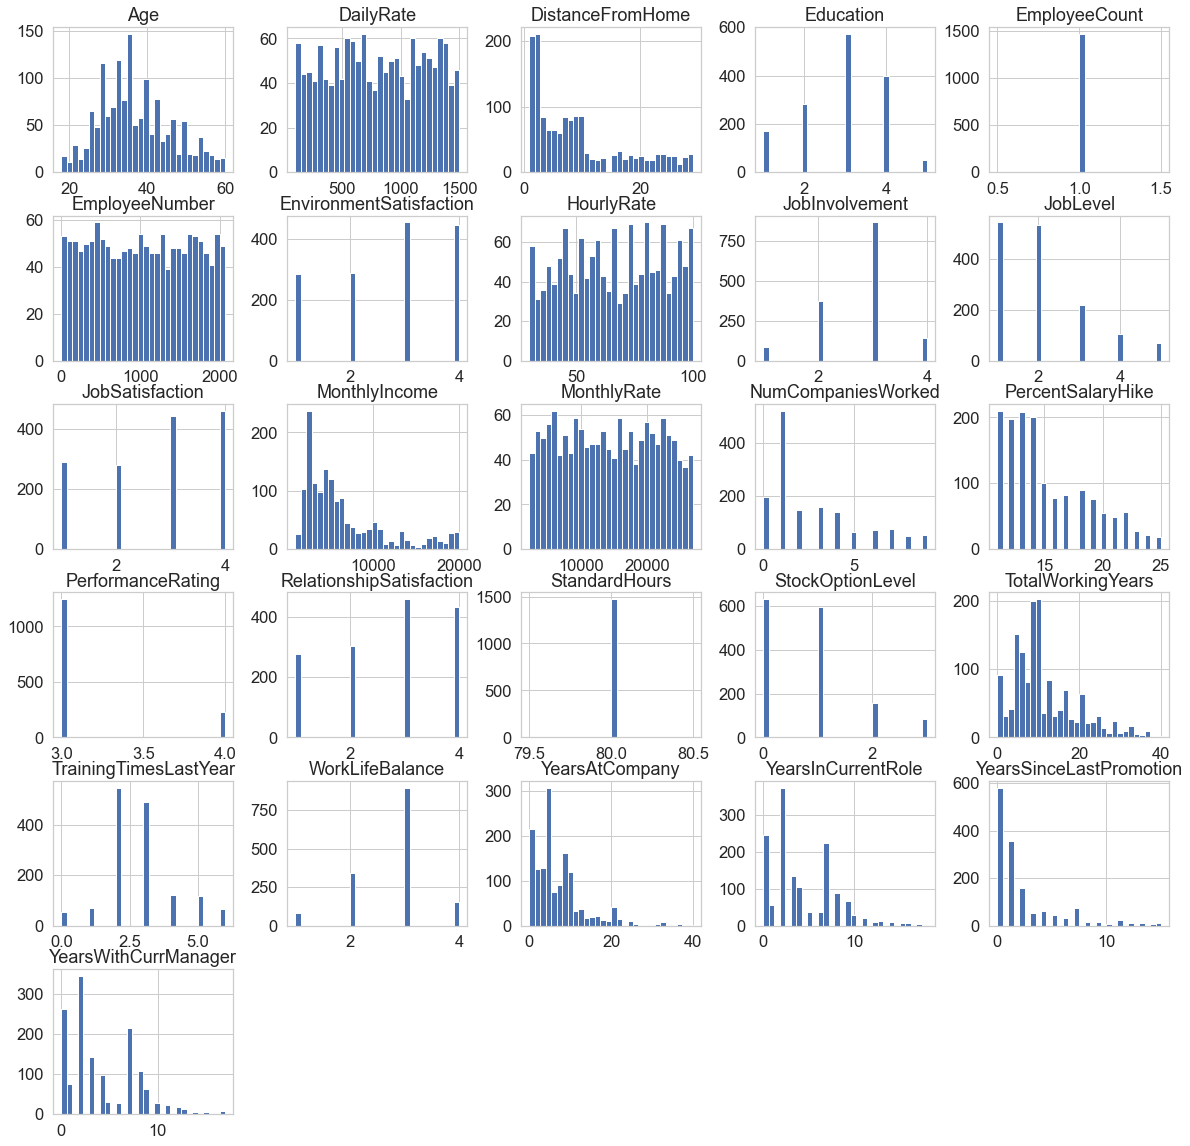

In [68]:
# plotting histogram for univariate analysis and chcking the normal distribution

HR.hist(figsize = (20,20), grid = True,layout = (6,5),bins = 30)

# Analysis Conclusion :


### Top Reasons why Employees leave the Organization:


1. No Overtime This was a surpirse, employees who don't have overtime are most likely to leave the organization. This could be that employees would like to have a higher amount of income or employees could feel that they are underused.

2. Monthly Income: As expected, Income is a huge factor as why employees leave the organization in search for a better salary.

3. Age: This could also be expected, since people who are aiming to retire will leave the organization.
